In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
import math
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras
from keras.models import Sequential


from keras.models import Model
#from tensorflow.python.keras.models import Input
#from tensorflow.python.keras.models import Model
#from tensorflow.keras.layers import InputLayer
from tensorflow.keras import Input
from tensorflow.keras import Model

from keras.layers import Concatenate, concatenate
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping

2022-12-08 12:33:19.927857: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
df1 = pd.read_csv('/uscms/home/jieun201/nobackup/YOURWORKINGAREA/dec8_ds8_ts/InputTrain_noYlocal.csv') #this is only 'image'
df2 = pd.read_csv('/uscms/home/jieun201/nobackup/YOURWORKINGAREA/dec8_ds8_ts/TrainSetLabel.csv')
df3 = pd.read_csv('/uscms/home/jieun201/nobackup/YOURWORKINGAREA/dec8_ds8_ts/InputTest_noYlocal.csv')
df4 = pd. read_csv('/uscms/home/jieun201/nobackup/YOURWORKINGAREA/dec8_ds8_ts/TestSetLabel.csv')

df5 = pd.read_csv('/uscms/home/jieun201/nobackup/YOURWORKINGAREA/dec8_ds8_ts/y-localTrain.csv') #ylocalTrain
df6 = pd.read_csv('/uscms/home/jieun201/nobackup/YOURWORKINGAREA/dec8_ds8_ts/y-localTest.csv') #ylocaltest

In [4]:
df1

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.0,0.0,0.0,0.0,1067.2,1217.3,2505.4,-925.0,0.0,0.0,...,4997.0,5316.4,5831.1,1948.4,-2.8,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,412.9,257.2,1192.5,-373.2,0.0,0.0,0.0,...,2064.0,2332.4,1344.4,-32.5,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,16.8,122.0,1968.0,339.0,-109.4,...,0.0,411.0,1633.0,1385.2,4510.0,211.3,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,-153.9,3021.3,-283.8,-1.1,0.0,0.0,...,2053.4,2420.6,5096.3,-135.6,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,52.5,584.6,730.5,546.5,1463.6,-398.4,...,1320.0,10265.0,2528.0,1603.9,1548.7,1687.7,-47.9,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652155,0.0,-249.2,980.2,3135.5,-3.6,388.3,1757.0,240.6,32.9,0.0,...,8012.8,2120.0,8278.4,4458.7,-35.9,0.0,0.0,0.0,0.0,0.0
652156,0.0,0.0,0.0,0.0,0.0,4.8,-734.3,11384.7,-1522.8,0.0,...,0.0,686.0,8268.2,7327.9,15370.1,-500.8,0.0,0.0,0.0,0.0
652157,0.0,0.0,0.0,0.0,0.0,-296.2,6767.9,907.0,919.2,114.2,...,0.0,-15.3,741.0,45888.2,-305.7,-0.3,0.0,0.0,0.0,0.0
652158,0.0,0.0,0.0,0.0,0.0,414.0,-46.3,3383.1,-787.0,-0.4,...,165.0,2367.0,3158.1,2621.3,3982.0,-143.4,0.0,0.0,0.0,0.0


In [5]:
df3

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.0,0.0,0.0,0.0,0.0,232.1,796.1,1083.5,-219.7,0.0,...,0.0,117.0,3214.7,4528.1,853.3,-1.3,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,385.9,1351.7,5826.4,4842.7,-1550.9,0.0,0.0,...,11754.8,7074.8,15228.7,5432.4,-0.9,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,479.7,5505.2,880.9,29.3,0.0,...,0.0,-0.4,12958.9,23231.1,-257.6,-0.1,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2319.7,1153.8,7671.1,-2229.8,0.0,0.0,...,8465.0,16018.2,13137.5,7692.6,-133.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,-1.5,133.4,3955.7,121.4,-42.5,-0.3,0.0,0.0,...,7505.3,11671.5,-47.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163035,0.0,0.0,0.0,0.0,0.0,695.4,2784.7,268.3,-486.5,0.0,...,0.0,41.0,4990.2,11465.6,-142.8,0.0,0.0,0.0,0.0,0.0
163036,0.0,0.0,0.0,0.0,0.0,115.6,10711.3,267.4,-40.4,-0.8,...,0.0,-53.4,11766.6,37260.9,-452.3,0.0,0.0,0.0,0.0,0.0
163037,0.0,0.0,0.0,0.0,475.6,409.2,1125.3,-495.6,0.0,0.0,...,1626.0,1888.9,2607.4,1077.6,-1.0,0.0,0.0,0.0,0.0,0.0
163038,0.0,0.0,0.0,529.9,5772.6,230.9,-317.1,0.0,0.0,0.0,...,11049.8,17849.2,-243.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X_train = df1.values
X_test = df3.values

y_train = df2.values #labels
y_test = df4.values #labels
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

n = 652160  #number in train set, need to reshape 'image'
nn = 163040 #number in test set, need to also reshape 'image'

X_train = np.reshape(X_train, (n,8,13))
X_test = np.reshape(X_test, (nn,8,13))

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train_ylocal = df5.values
X_test_ylocal = df6.values
print(X_train_ylocal.shape, X_test_ylocal.shape)

(652160, 8, 13) (163040, 8, 13) (652160, 1) (163040, 1)
(652160, 1) (163040, 1)


In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)


X_train_ylocal = scaler.fit_transform(X_train_ylocal.reshape(-1, X_train_ylocal.shape[-1])).reshape(X_train_ylocal.shape)
X_test_ylocal =scaler.fit_transform(X_test_ylocal.reshape(-1, X_test_ylocal.shape[-1])).reshape(X_test_ylocal.shape)

In [8]:
input1 = Input(shape=(8,13,1))
conv1 = Conv2D(16, (3, 3), strides=(1, 1), activation='relu')(input1)
conv2 = Conv2D(64, (3, 3), strides=(1, 1), activation='relu')(conv1)
flattenLayer = Flatten()(conv2)
input2 = Input(shape=(1,))
merge = concatenate([flattenLayer, input2])
dense1 = Dense(32, activation='relu')(merge)
dropout1 = Dropout(0.1)(dense1)
#dense2 = Dense(1, activation='sigmoid')(dropout1)
dense2 = Dense(3)(dropout1)
model = Model(inputs =[input1, input2], outputs=dense2)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8, 13, 1)]   0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 6, 11, 16)    160         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 4, 9, 64)     9280        ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 2304)         0           ['conv2d_1[0][0]']               
                                                                                              

2022-12-08 12:33:32.095707: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-08 12:33:32.135347: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-08 12:33:32.135721: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-08 12:33:32.136931: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

In [9]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), # default from_logits=False
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

es = EarlyStopping(monitor='val_sparse_categorical_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)


history = model.fit(x = (X_train,X_train_ylocal),
                    y = y_train,
                    callbacks=[es],
                    epochs=100, 
                    batch_size=1024,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)


Epoch 1/100


2022-12-08 12:33:34.971867: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401
2022-12-08 12:33:36.493432: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Running ptxas --version returned 32512
2022-12-08 12:33:36.757152: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: ptxas exited with non-zero error code 32512, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2022-12-08 12:33:36.819663: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


510/510 [==============================] - 6s 5ms/step - loss: 0.7080 - sparse_categorical_accuracy: 0.6759 - val_loss: 0.5368 - val_sparse_categorical_accuracy: 0.7649
Epoch 2/100
510/510 [==============================] - 2s 4ms/step - loss: 0.5092 - sparse_categorical_accuracy: 0.7779 - val_loss: 0.4740 - val_sparse_categorical_accuracy: 0.7926
Epoch 3/100
510/510 [==============================] - 2s 4ms/step - loss: 0.4621 - sparse_categorical_accuracy: 0.7992 - val_loss: 0.4402 - val_sparse_categorical_accuracy: 0.8081
Epoch 4/100
510/510 [==============================] - 2s 4ms/step - loss: 0.4409 - sparse_categorical_accuracy: 0.8081 - val_loss: 0.4257 - val_sparse_categorical_accuracy: 0.8164
Epoch 5/100
510/510 [==============================] - 2s 4ms/step - loss: 0.4271 - sparse_categorical_accuracy: 0.8144 - val_loss: 0.4046 - val_sparse_categorical_accuracy: 0.8263
Epoch 6/100
510/510 [==============================] - 2s 4ms/step - loss: 0.4162 - sparse_categorical_accu

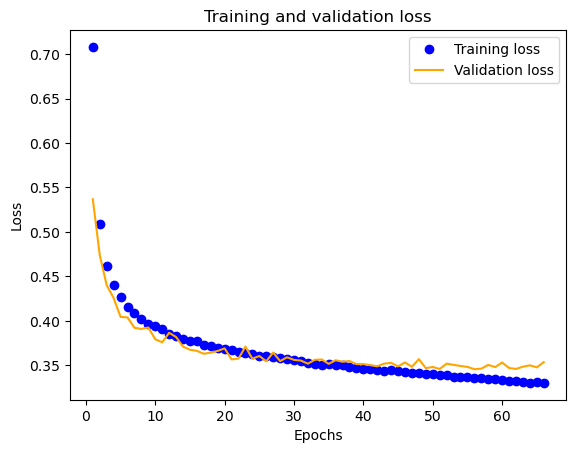

In [10]:
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 
epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss.png')

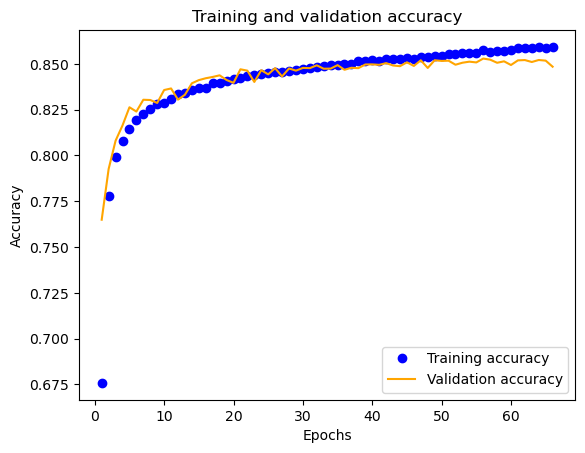

In [11]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
np.max(val_acc)
plt.savefig('accuracy.png')

In [12]:
preds = model.predict(x = (X_test,X_test_ylocal))

5095/5095 [==============================] - 6s 1ms/step


In [13]:
predictionsFiles =np.argmax(preds, axis=1)
predictionsFiles

array([1, 2, 0, ..., 1, 0, 2])

In [14]:
#predictionsFiles = np.round(model.predict(x = (X_test,X_test_ylocal)),0)

In [15]:
pd.DataFrame(predictionsFiles).to_csv("predictionsFiles.csv",header='predict', index=False)

In [16]:
pd.DataFrame(y_test).to_csv("true.csv",header='true', index=False)

Confusion matrix:
[[67087  6370  8063]
 [ 7440 33289    31]
 [ 5802    27 34931]]


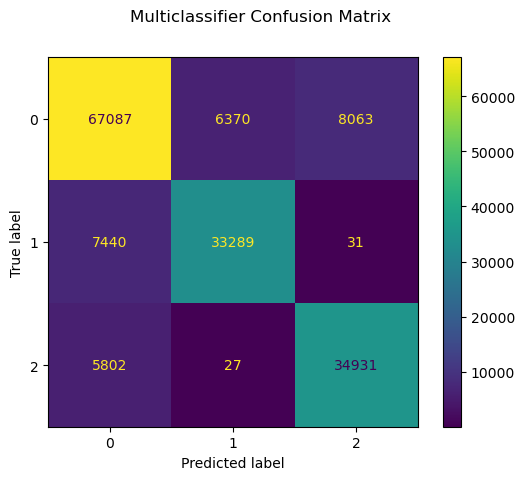

In [17]:
from sklearn import datasets, svm, metrics
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictionsFiles)
disp.figure_.suptitle("Multiclassifier Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.savefig('confusionMatrix.png')
plt.show()

In [18]:
score = model.evaluate( (X_test,X_test_ylocal), y_test, verbose=1)

print("Test loss:", score[0])
print("Test accuracy:", score[1])

5095/5095 [==============================] - 10s 2ms/step - loss: 0.3970 - sparse_categorical_accuracy: 0.8299
Test loss: 0.3970339298248291
Test accuracy: 0.8299006223678589
